In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### This repository contains information from the 2019 election, combined with information from the 2016 Census which includes gender, age and income. With this information, I used techniques such as logistic regression, KMeans Clustering and Data Visualisation to try and accurately predict the winning party from each electorate. The belonging files are Cleaning.ipynb, Frame.ipynb and the CSV files.


In [2]:
act = pd.read_csv("HouseStateFirstPrefsByPollingPlaceDownload-24310-ACT.csv", skiprows=1)
nsw = pd.read_csv("HouseStateFirstPrefsByPollingPlaceDownload-24310-NSW.csv", skiprows=1)
nt = pd.read_csv("HouseStateFirstPrefsByPollingPlaceDownload-24310-NT.csv", skiprows=1)
qld = pd.read_csv("HouseStateFirstPrefsByPollingPlaceDownload-24310-QLD.csv", skiprows=1)
sa = pd.read_csv("HouseStateFirstPrefsByPollingPlaceDownload-24310-SA.csv", skiprows=1)
tas = pd.read_csv("HouseStateFirstPrefsByPollingPlaceDownload-24310-TAS.csv", skiprows=1)
vic = pd.read_csv("HouseStateFirstPrefsByPollingPlaceDownload-24310-VIC.csv", skiprows=1)
wa = pd.read_csv("HouseStateFirstPrefsByPollingPlaceDownload-24310-WA.csv", skiprows=1)


In [3]:
wa

,StateAb,DivisionID,DivisionNm,PollingPlaceID,PollingPlace,CandidateID,Surname,GivenNm,BallotPosition,Elected,HistoricElected,PartyAb,PartyNm,OrdinaryVotes,Swing
0,WA,235,Brand,7472,Baldivis,32431,VANDER VEN,Janine Joy,1,N,N,AUC,Australian Christians,73,-2.90
1,WA,235,Brand,7472,Baldivis,33394,KING,Madeleine,2,Y,Y,ALP,Australian Labor Party,854,-5.96
2,WA,235,Brand,7472,Baldivis,33398,PLEITER,Jack,3,N,N,LP,Liberal,908,-0.01
3,WA,235,Brand,7472,Baldivis,32479,MILLS,Karen-Lee,4,N,N,FACN,FRASER ANNING'S CONSERVATIVE NATIONAL PARTY,27,1.14
4,WA,235,Brand,7472,Baldivis,32156,FREEMAN,Jody,5,N,N,GRN,The Greens (WA),265,2.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8328,WA,248,Tangney,11635,Winthrop,32524,SPENCER,Martin,6,N,N,GRN,The Greens (WA),259,-0.72
8329,WA,248,Tangney,11635,Winthrop,33436,MORTON,Ben,7,Y,Y,LP,Liberal,1629,5.69
8330,WA,248,Tangney,11635,Winthrop,32907,FERNANDEZ,Chris,8,N,N,UAPP,United Australia Party,26,0.93
8331,WA,248,Tangney,11635,Winthrop,33359,WAUGH,Gavin,9,N,N,WAP,WESTERN AUSTRALIA PARTY,22,0.79


In [4]:
frames = [act, nsw, nt, qld, sa, tas, vic, wa]
df = pd.concat(frames)

In [5]:
df.describe()

,DivisionID,PollingPlaceID,CandidateID,BallotPosition,OrdinaryVotes,Swing
count,71805.000000,71805.000000,71805.000000,71805.000000,71805.000000,71805.000000
mean,194.288392,23991.982076,28878.364390,127.159752,174.839719,1.023806
std,62.278573,29592.725449,10515.739557,327.419595,466.677549,6.259812
min,101.000000,1.000000,999.000000,1.000000,0.000000,-96.660000
25%,144.000000,3567.000000,32372.000000,3.000000,13.000000,-0.940000
50%,183.000000,7260.000000,32783.000000,5.000000,44.000000,1.150000
75%,234.000000,34061.000000,33238.000000,7.000000,151.000000,3.180000
max,325.000000,97639.000000,33656.000000,999.000000,12402.000000,85.710000


In [6]:
df.shape

(71805, 15)

In [7]:
df.head()

,StateAb,DivisionID,DivisionNm,PollingPlaceID,PollingPlace,CandidateID,Surname,GivenNm,BallotPosition,Elected,HistoricElected,PartyAb,PartyNm,OrdinaryVotes,Swing
0,ACT,318,Bean,93925,Belconnen BEAN PPVC,33426,FAULKNER,Therese,1,N,N,AUP,Australian Progressives,22,3.12
1,ACT,318,Bean,93925,Belconnen BEAN PPVC,32130,CHRISTIE,Jamie,2,N,N,IND,Independent,43,6.09
2,ACT,318,Bean,93925,Belconnen BEAN PPVC,33391,RUSHTON,Ben,3,N,N,GAP,The Great Australian Party,12,1.70
3,ACT,318,Bean,93925,Belconnen BEAN PPVC,32921,DONNELLY,Matt,4,N,N,LDP,Liberal Democrats,23,3.26
4,ACT,318,Bean,93925,Belconnen BEAN PPVC,32261,HANLEY,Tony,5,N,N,UAPP,United Australia Party,18,2.55


In [8]:
df.isna().any().sum()

2

In [9]:
df.isnull().any().sum()

2

In [10]:
df_clean = df.dropna()

In [11]:
df_clean.shape

(62847, 15)

In [12]:
df_clean["StateAb"].value_counts()

NSW    19927
VIC    14262
QLD    12546
WA      7433
SA      5175
TAS     2132
ACT      916
NT       456
Name: StateAb, dtype: int64

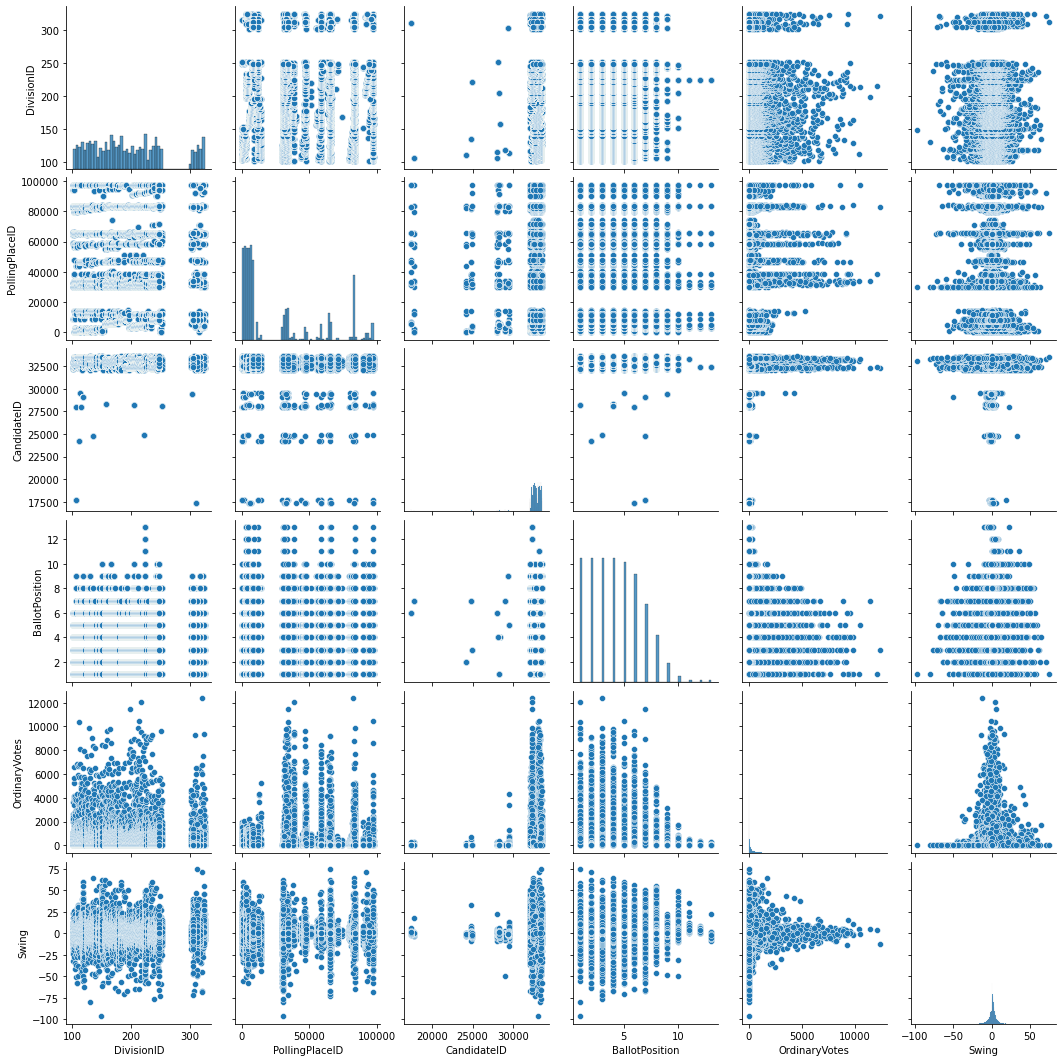

In [13]:
sns.pairplot(df_clean)

In [14]:
df.tail()

,StateAb,DivisionID,DivisionNm,PollingPlaceID,PollingPlace,CandidateID,Surname,GivenNm,BallotPosition,Elected,HistoricElected,PartyAb,PartyNm,OrdinaryVotes,Swing
8328,WA,248,Tangney,11635,Winthrop,32524,SPENCER,Martin,6,N,N,GRN,The Greens (WA),259,-0.72
8329,WA,248,Tangney,11635,Winthrop,33436,MORTON,Ben,7,Y,Y,LP,Liberal,1629,5.69
8330,WA,248,Tangney,11635,Winthrop,32907,FERNANDEZ,Chris,8,N,N,UAPP,United Australia Party,26,0.93
8331,WA,248,Tangney,11635,Winthrop,33359,WAUGH,Gavin,9,N,N,WAP,WESTERN AUSTRALIA PARTY,22,0.79
8332,WA,248,Tangney,11635,Winthrop,999,Informal,Informal,999,N,N,NaN,Informal,133,1.75


<AxesSubplot:>

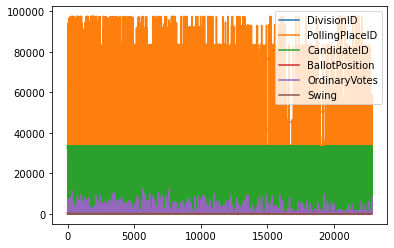

In [15]:
df.plot()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71805 entries, 0 to 8332
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateAb          71805 non-null  object 
 1   DivisionID       71805 non-null  int64  
 2   DivisionNm       71805 non-null  object 
 3   PollingPlaceID   71805 non-null  int64  
 4   PollingPlace     71805 non-null  object 
 5   CandidateID      71805 non-null  int64  
 6   Surname          71805 non-null  object 
 7   GivenNm          71805 non-null  object 
 8   BallotPosition   71805 non-null  int64  
 9   Elected          71805 non-null  object 
 10  HistoricElected  71805 non-null  object 
 11  PartyAb          62930 non-null  object 
 12  PartyNm          71722 non-null  object 
 13  OrdinaryVotes    71805 non-null  int64  
 14  Swing            71805 non-null  float64
dtypes: float64(1), int64(5), object(9)
memory usage: 8.8+ MB


In [17]:
df.isnull().values.any()

True

In [18]:
df.mean()

DivisionID          194.288392
PollingPlaceID    23991.982076
CandidateID       28878.364390
BallotPosition      127.159752
OrdinaryVotes       174.839719
Swing                 1.023806
dtype: float64

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [20]:
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 2)

In [21]:
len(X)

200

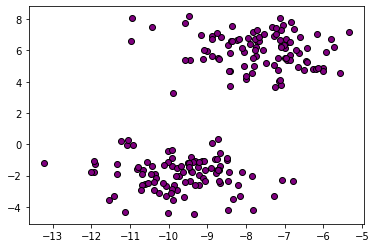

In [22]:
plt.scatter(X[:, 0], X[:, 1], c = 'purple', edgecolor = 'black')

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 4, tol=1e-04, random_state=2)

In [24]:
data = kmeans.fit_predict(X)

In [25]:
data

array([0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1,
       0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0,
       2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int32)

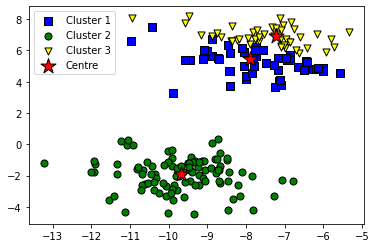

In [26]:
plt.scatter(X[data == 0, 0], X[data == 0, 1], s = 50, c = 'blue', marker = 's', edgecolor = 'black', label = 'Cluster 1')
plt.scatter(X[data == 1, 0], X[data == 1, 1], s = 50, c = 'green', marker = 'o', edgecolor = 'black', label = 'Cluster 2')
plt.scatter(X[data == 2, 0], X[data == 2, 1], s = 50, c = 'yellow', marker = 'v', edgecolor = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', edgecolor = 'black', label = 'Centre')
plt.legend(scatterpoints = 1)

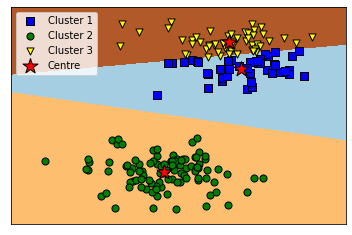

In [27]:
import numpy as np
np.random.seed(42)
kmeans = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 8, tol = 1e-04, random_state = 2)
kmeans.fit(X)
h = .01     
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
data = kmeans.fit_predict(X)
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Paired, aspect = 'auto', origin = 'lower')
plt.scatter(X[data == 0, 0], X[data == 0, 1], s = 50, c = 'blue', marker = 's', edgecolor = 'black', label = 'Cluster 1')
plt.scatter(X[data == 1, 0], X[data == 1, 1], s = 50, c = 'green', marker = 'o', edgecolor = 'black', label = 'Cluster 2')
plt.scatter(X[data == 2, 0], X[data == 2, 1], s = 50, c = 'yellow', marker = 'v', edgecolor = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', edgecolor = 'black', label = 'Centre')
plt.legend(scatterpoints = 1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

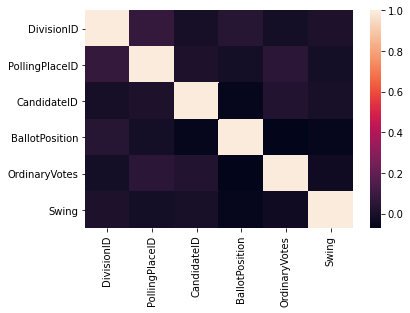

In [28]:
corr = df_clean.corr()
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr)
plt.show()

In [29]:
df_clean.corr()

,DivisionID,PollingPlaceID,CandidateID,BallotPosition,OrdinaryVotes,Swing
DivisionID,1.000000,0.078095,-0.005311,0.038861,-0.013342,0.009600
PollingPlaceID,0.078095,1.000000,0.012851,-0.015550,0.053328,-0.011555
CandidateID,-0.005311,0.012851,1.000000,-0.056223,0.027472,-0.000601
BallotPosition,0.038861,-0.015550,-0.056223,1.000000,-0.069912,-0.057054
OrdinaryVotes,-0.013342,0.053328,0.027472,-0.069912,1.000000,-0.024279
Swing,0.009600,-0.011555,-0.000601,-0.057054,-0.024279,1.000000


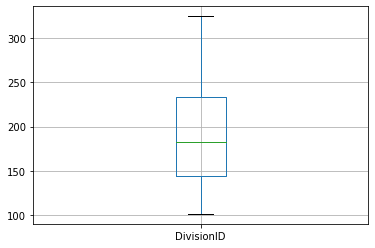

In [30]:
bp = df.boxplot(column = ['DivisionID'])

<AxesSubplot:>

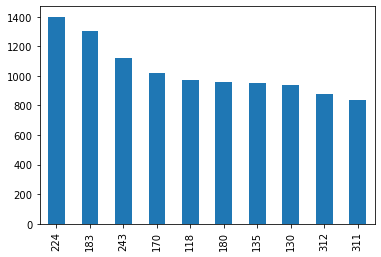

In [31]:
df['DivisionID'].value_counts()[:10].plot(kind = 'bar')

In [32]:
df['DivisionID'].unique()

array([318, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113,
       114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128,
       130, 131, 132, 133, 315, 134, 135, 136, 137, 138, 139, 140, 249,
       144, 145, 250, 146, 148, 149, 151, 251, 152, 153, 150, 306, 307,
       304, 310, 155, 156, 157, 158, 252, 159, 160, 161, 311, 162, 163,
       164, 165, 166, 167, 168, 169, 302, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 316, 179, 180, 182, 183, 185, 186, 187, 188, 325,
       190, 192, 193, 319, 195, 196, 197, 198, 200, 201, 203, 204, 205,
       320, 207, 208, 209, 210, 211, 321, 212, 213, 214, 309, 215, 216,
       217, 218, 219, 220, 221, 223, 222, 322, 224, 225, 226, 228, 229,
       323, 324, 232, 233, 234, 235, 317, 236, 237, 238, 312, 239, 240,
       305, 242, 243, 244, 245, 246, 247, 248])

In [33]:
df['DivisionID'].cumsum()

0            318
1            636
2            954
3           1272
4           1590
          ...   
8328    13949886
8329    13950134
8330    13950382
8331    13950630
8332    13950878
Name: DivisionID, Length: 71805, dtype: int64

In [34]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8323, 8324, 8325, 8326, 8327, 8328, 8329, 8330, 8331, 8332],
           dtype='int64', length=71805)

<AxesSubplot:ylabel='StateAb'>

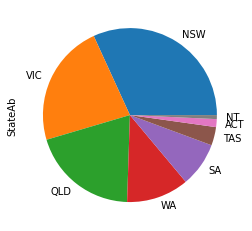

In [37]:
df['StateAb'].value_counts()[:10].plot(kind = 'pie')